# Exploring NEON soil co2 data at JORN

2022-10-24 by Greg Maurer

This demo is based on https://www.neonscience.org/eddy-data-intro

In [33]:
# Attach libraries and set options
library(neonUtilities)
library(repr)
options(stringsAsFactors=F)
options(repr.plot.width = 8.5, repr.plot.height = 5)

## Method 1 - Download, unpack and stack data

In [8]:
# Download hdf5 files to your favorite directory
zipsByProduct(dpID="DP1.00095.001", package="basic", 
              site=c("JORN"), 
              startdate="2021-01", enddate="2022-09",
              savepath="~/data/rawdata/NEONdata", 
              check.size=F)

Finding available files
  |======================================================================| 100%

  |============================                                          |  40%
NEON.D14.JORN.DP1.00095.001.2021-08.basic.20221018T222207Z.PROVISIONAL.zip could not be downloaded. Re-attempting.
  |===================================                                   |  50%
NEON.D14.JORN.DP1.00095.001.2021-10.basic.20221018T203709Z.PROVISIONAL.zip could not be downloaded. Re-attempting.
  |==============================================                        |  65%
NEON.D14.JORN.DP1.00095.001.2022-01.basic.20221018T200236Z.PROVISIONAL.zip could not be downloaded. Re-attempting.
  |============================================================          |  85%
NEON.D14.JORN.DP1.00095.001.2022-05.basic.20221018T213656Z.PROVISIONAL.zip could not be downloaded. Re-attempting.
  |======================================================================| 100%
21 files successfully downloaded to

In [9]:
# stackBy extracts the hdf5 aarchives and stacks to a series of dataframes
# and puts them in filepath
co2 <- stackByTable(filepath="~/data/rawdata/NEONdata/filesToStack00095/")

Unpacking zip files using 1 cores.
Stacking operation across a single core.
Stacking table SCO2C_1_minute
Stacking table SCO2C_30_minute
Merged the most recent publication of sensor position files for each site and saved to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 2 data tables and 3 metadata tables!
Stacking took 41.72328 secs
All unzipped monthly data folders have been removed.


In [38]:
library('tidyverse')
# Here we read the 30 minute soil CO2 data file created with stackBy
co2_1 <- read_csv("~/data/rawdata/NEONdata/filesToStack00095/stackedFiles//SCO2C_30_minute.csv")

Rows: 459360 Columns: 16
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): domainID, siteID, horizontalPosition, release
dbl  (9): verticalPosition, soilCO2concentrationMean, soilCO2concentrationMi...
dttm (3): startDateTime, endDateTime, publicationDate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Method 2: Use loadByProduct

This does the steps above all in one fell swoop (download, stack, load to a list of dataframes).

In [18]:
# Now try loadbyproduct
co2_2 <- loadByProduct("DP1.00095.001", package="basic", 
              site=c("JORN"), 
              startdate="2021-01", enddate="2022-09",
              timeIndex=30)

Finding available files
  |======================================================================| 100%


Continuing will download files totaling approximately 41.206577 MB. Do you want to proceed y/n:  y



  |======================================================================| 100%

Stacking operation across a single core.
Stacking table SCO2C_30_minute
Merged the most recent publication of sensor position files for each site and saved to /stackedFiles
Copied the most recent publication of variable definition file to /stackedFiles
Finished: Stacked 1 data tables and 3 metadata tables!
Stacking took 3.586025 secs


In [20]:
names(co2_2)


[1] "issueLog_00095"         "readme_00095"           "SCO2C_30_minute"       
[4] "sensor_positions_00095" "variables_00095"

In [22]:
head(co2_2$SCO2C_30_minute)

,domainID,siteID,horizontalPosition,verticalPosition,startDateTime,endDateTime,soilCO2concentrationMean,soilCO2concentrationMinimum,soilCO2concentrationMaximum,soilCO2concentrationVariance,soilCO2concentrationNumPts,soilCO2concentrationExpUncert,soilCO2concentrationStdErMean,finalQF,publicationDate,release
,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,D14,JORN,001,501,2021-01-01 00:00:00,2021-01-01 00:30:00,473.50,460.63,488.88,32.19,180,6.896,0.4229,0,20211218T160923Z,undetermined
2,D14,JORN,001,501,2021-01-01 00:30:00,2021-01-01 01:00:00,456.77,443.62,468.61,26.73,180,6.606,0.3854,0,20211218T160923Z,undetermined
3,D14,JORN,001,501,2021-01-01 01:00:00,2021-01-01 01:30:00,441.01,427.93,453.75,22.52,180,6.392,0.3537,0,20211218T160923Z,undetermined
4,D14,JORN,001,501,2021-01-01 01:30:00,2021-01-01 02:00:00,427.61,417.23,438.32,20.21,180,6.173,0.3351,0,20211218T160923Z,undetermined
5,D14,JORN,001,501,2021-01-01 02:00:00,2021-01-01 02:30:00,416.11,405.46,426.80,14.80,180,6.003,0.2867,0,20211218T160923Z,undetermined
6,D14,JORN,001,501,2021-01-01 02:30:00,2021-01-01 03:00:00,406.75,396.36,414.62,12.65,180,5.829,0.2651,0,20211218T160923Z,undetermined


## Plot co2 data from both methods

Warning message in plot.window(...):
“"format" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"format" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"format" is not a graphical parameter”
Warning message in box(...):
“"format" is not a graphical parameter”
Warning message in title(...):
“"format" is not a graphical parameter”


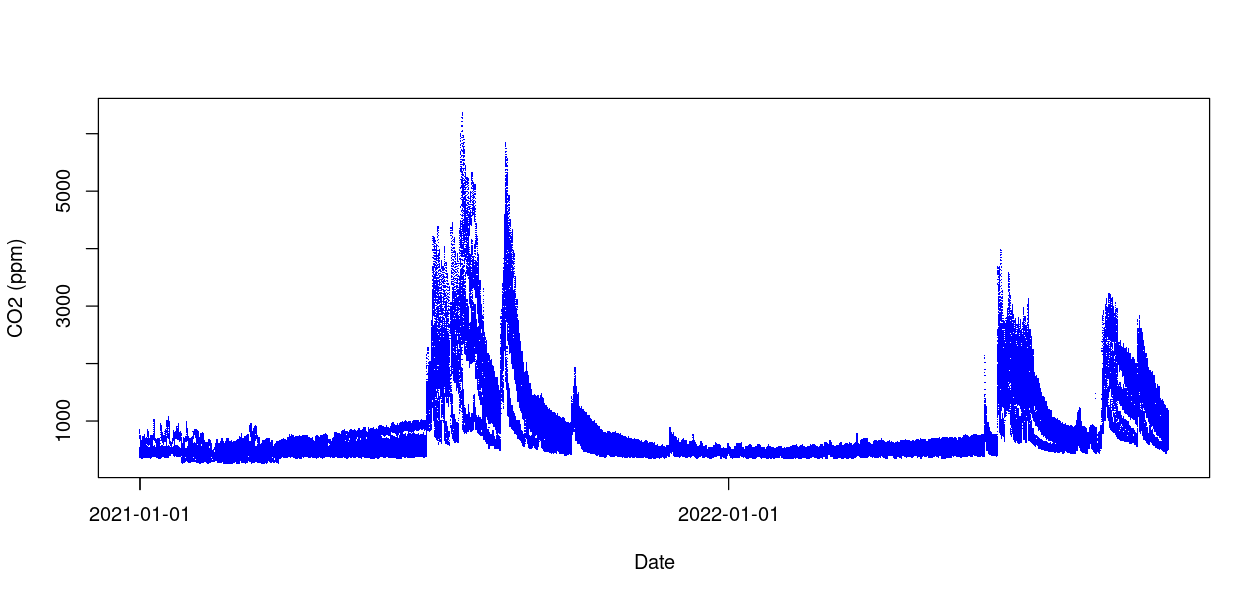

In [39]:
options(repr.plot.width = 10.5, repr.plot.height = 5)
# Plot data from the first method 
plot(soilCO2concentrationMean~endDateTime, data=co2_1, col='blue', pch=".",
    xlab="Date", ylab="CO2 (ppm)", format="%Y-%m-%d")

Warning message in plot.window(...):
“"format" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"format" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"format" is not a graphical parameter”
Warning message in box(...):
“"format" is not a graphical parameter”
Warning message in title(...):
“"format" is not a graphical parameter”


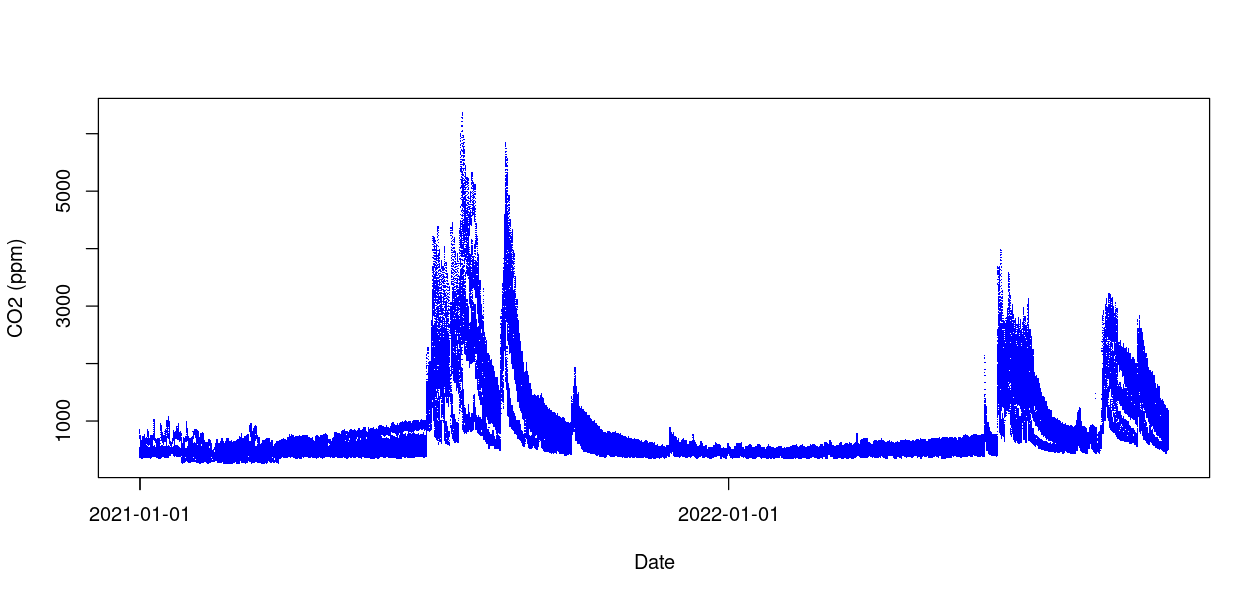

In [40]:
# Plot data from the loadByProduct method
plot(soilCO2concentrationMean~endDateTime, data=co2_2$SCO2C_30_minute, col='blue', pch=".",
    xlab="Date", ylab="CO2 (ppm)", format="%Y-%m-%d")


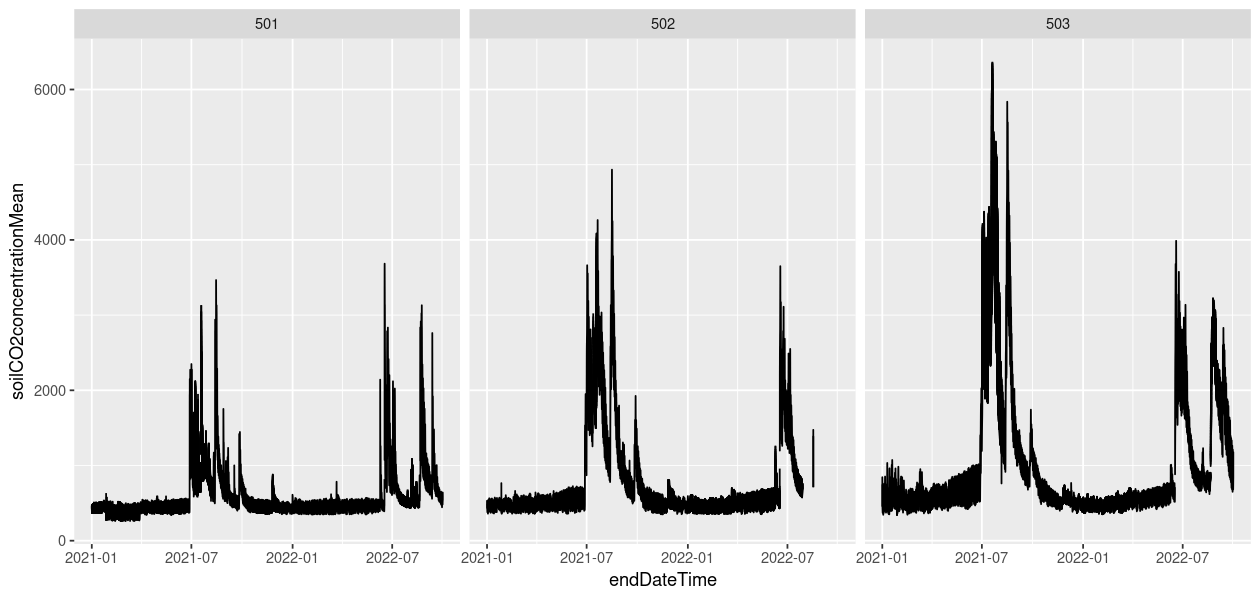

In [42]:
# Plot by sensor depth
g <- ggplot(data=co2_1, aes(y=soilCO2concentrationMean, x=endDateTime)) +
  geom_line() + facet_wrap(~verticalPosition)

g